In [1]:
!pip install pandas matplotlib prophet

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.1 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 21.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --------------- ------------------------ 5.2/13.3 MB 26.5 MB/s eta 0:00:01
   ----------------------------- ---------- 9.7/13.3 MB 23.1 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 20.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 17.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:-

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset.csv', parse_dates=['datetime'])

In [4]:
df = df.rename(columns={'datetime': 'ds', 'hub_price': 'y'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2208 non-null   datetime64[ns]
 1   y       2208 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.6 KB


In [6]:
df.head()

,ds,y
0,2020-01-01 00:00:00,57.903894
1,2020-01-01 01:00:00,53.168548
2,2020-01-01 02:00:00,50.106973
3,2020-01-01 03:00:00,54.937780
4,2020-01-01 04:00:00,59.713395


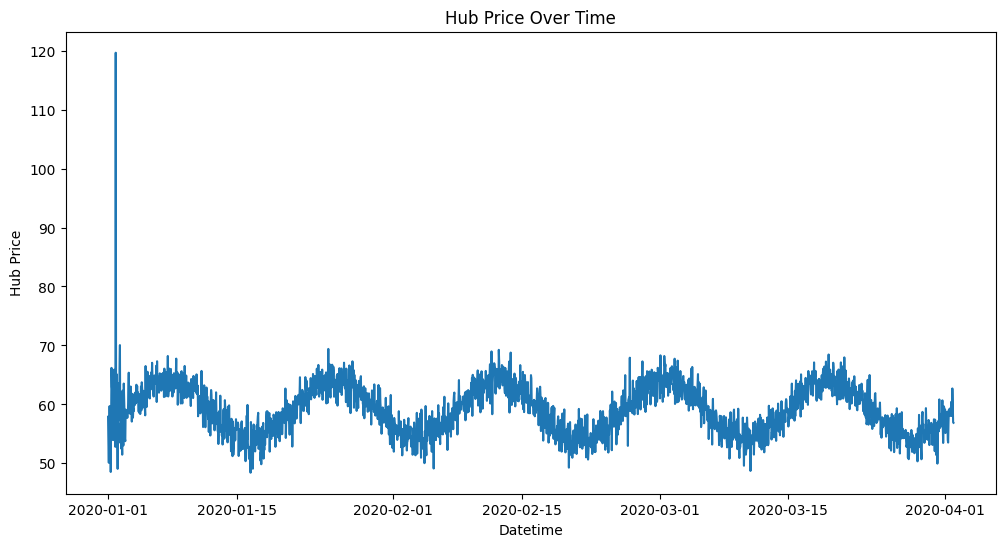

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'])
plt.title('Hub Price Over Time')
plt.xlabel('Datetime')
plt.ylabel('Hub Price')
plt.show()

In [8]:
train = df.iloc[:-100]
test = df.iloc[-100:]

In [9]:
from prophet import Prophet

# Initialize and fit the model
model = Prophet()
model.fit(train)

Importing plotly failed. Interactive plots will not work.
22:26:57 - cmdstanpy - INFO - Chain [1] start processing
22:26:58 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----------- ---------------------------- 2.9/9.6 MB 15.8 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.6 MB 15.1 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 13.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
future = model.make_future_dataframe(periods=100, freq='h')

In [13]:
forecast = model.predict(future)

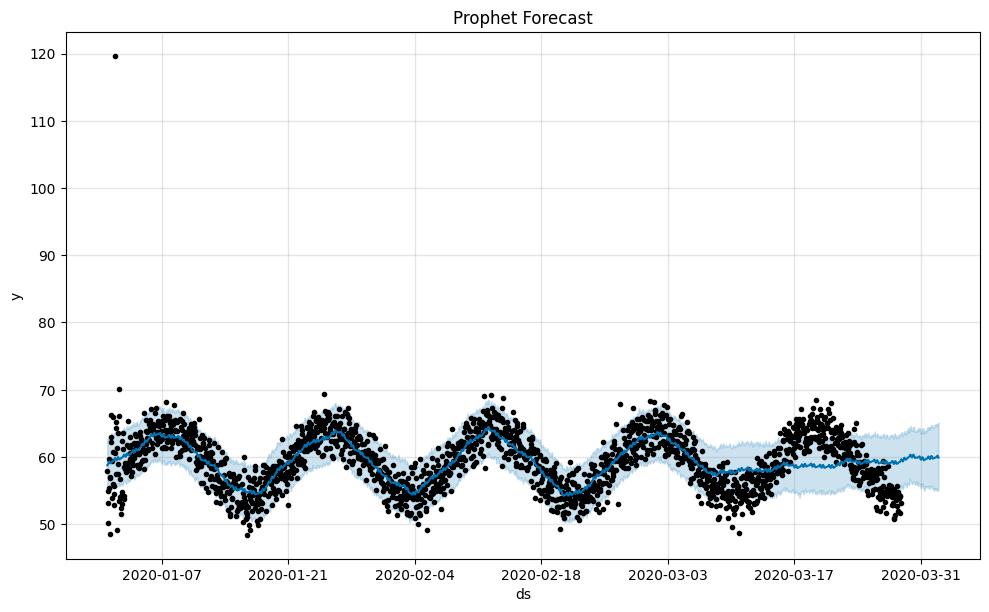

In [14]:
fig1 = model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

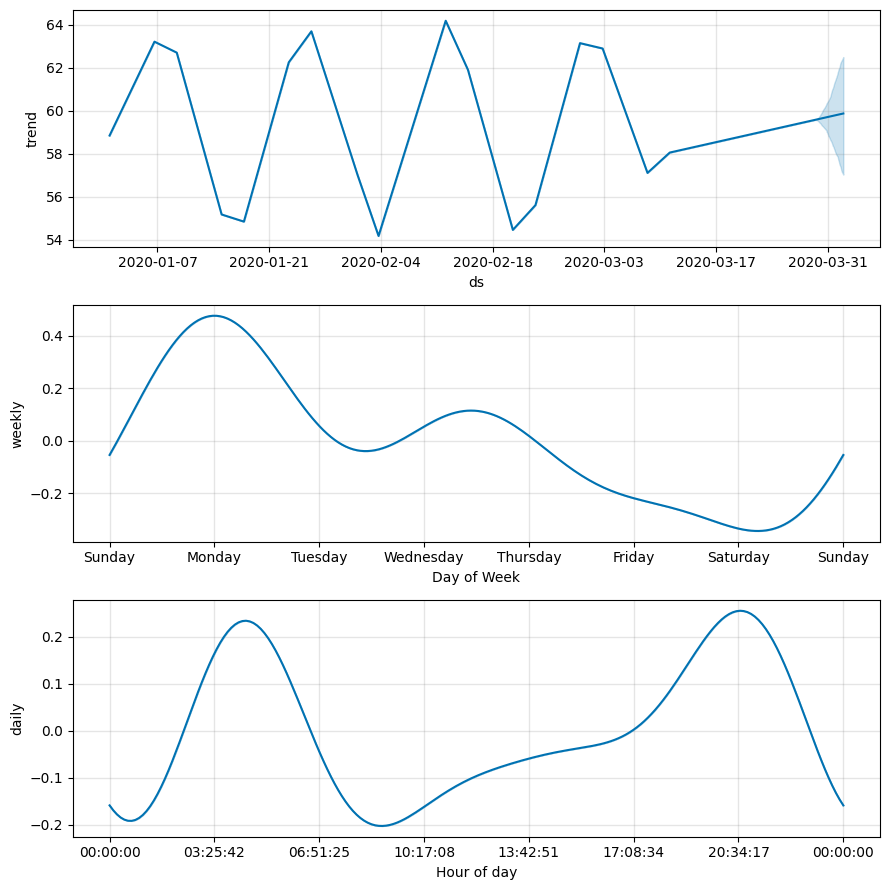

In [15]:
# Plot forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

# Get the last 100 predictions
predicted = forecast[['ds', 'yhat']].set_index('ds').iloc[-100:]
actual = test.set_index('ds')

In [17]:
# Align indices just in case
predicted = predicted.loc[actual.index]

# Calculate Mean Squared Error
mse = mean_squared_error(actual['y'], predicted['yhat'])
print('Mean Squared Error:', mse)

Mean Squared Error: 20.819956504208577


In [19]:
future = model.make_future_dataframe(periods=24, freq='h')
forecast = model.predict(future)
print(forecast[['ds', 'yhat']].tail(24))

                      ds       yhat
2108 2020-03-28 20:00:00  59.609855
2109 2020-03-28 21:00:00  59.650627
2110 2020-03-28 22:00:00  59.584676
2111 2020-03-28 23:00:00  59.447859
2112 2020-03-29 00:00:00  59.336846
2113 2020-03-29 01:00:00  59.344520
2114 2020-03-29 02:00:00  59.489188
2115 2020-03-29 03:00:00  59.696383
2116 2020-03-29 04:00:00  59.850844
2117 2020-03-29 05:00:00  59.878045
2118 2020-03-29 06:00:00  59.791014
2119 2020-03-29 07:00:00  59.669478
2120 2020-03-29 08:00:00  59.595303
2121 2020-03-29 09:00:00  59.599854
2122 2020-03-29 10:00:00  59.660339
2123 2020-03-29 11:00:00  59.735362
2124 2020-03-29 12:00:00  59.800072
2125 2020-03-29 13:00:00  59.852561
2126 2020-03-29 14:00:00  59.897959
2127 2020-03-29 15:00:00  59.936897
2128 2020-03-29 16:00:00  59.972090
2129 2020-03-29 17:00:00  60.019116
2130 2020-03-29 18:00:00  60.098666
2131 2020-03-29 19:00:00  60.209416


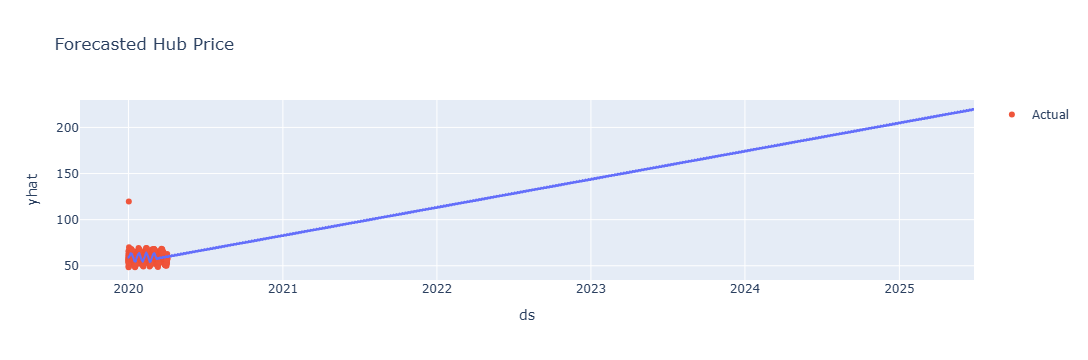

In [29]:
import plotly.express as px

fig = px.line(forecast, x='ds', y='yhat', title='Forecasted Hub Price')
fig.add_scatter(x=df['ds'], y=df['y'], mode='markers', name='Actual')
fig.show()
